# Muestreo de Distribuciones

## Objetivos

Que el estudiante ses capaz de:
  - Comprender la diferencia entre población y muestra.
  - Comprender la utilidad de los gráficos de dispersión, histogramas y la CDF empírica para visualizar una muestra.
  - Diferenciar lo que significa que una muestra sea independiente e idénticamente distribuida.
  - Definir la distribución muestral de un estadístico.
  - Utilizar el bootstrapping para aproximar la distribución de una estadística.
  - Utilizar el bootstrapping para aproximar un intervalo de confianza para un parámetro poblacional.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Temario

- Visualización
- Media y Máximo
- Muestra de la población
- Intervalo de confianza
- Teorema del límite central (para la media)
- Bootstrap (para todas las demás estadísticas)

## Visualización

Crearemos un conjunto de datos aleatoio

In [2]:
np.random.seed(42)
mean = 0.1
stdev = 1.0
data = stats.norm(mean, stdev).rvs(100)
print(data)

[ 0.59671415 -0.0382643   0.74768854  1.62302986 -0.13415337 -0.13413696
  1.67921282  0.86743473 -0.36947439  0.64256004 -0.36341769 -0.36572975
  0.34196227 -1.81328024 -1.62491783 -0.46228753 -0.91283112  0.41424733
 -0.80802408 -1.3123037   1.56564877 -0.1257763   0.1675282  -1.32474819
 -0.44438272  0.21092259 -1.05099358  0.47569802 -0.50063869 -0.19169375
 -0.50170661  1.95227818  0.08650278 -0.95771093  0.92254491 -1.12084365
  0.3088636  -1.85967012 -1.22818605  0.29686124  0.83846658  0.27136828
 -0.01564828 -0.2011037  -1.37852199 -0.61984421 -0.36063877  1.15712223
  0.44361829 -1.66304016  0.42408397 -0.28508228 -0.576922    0.71167629
  1.13099952  1.03128012 -0.73921752 -0.20921238  0.43126343  1.07554513
 -0.37917424 -0.08565898 -1.00633497 -1.09620662  0.91252582  1.45624003
  0.02798988  1.1035329   0.46163603 -0.54511975  0.46139561  1.63803657
  0.06417396  1.66464366 -2.5197451   0.9219025   0.18704707 -0.19900735
  0.19176078 -1.88756891 -0.11967189  0.45711257  1

En la maypría de los casos de una a 3 dimensiones, utilizar métodos de visualización reduce la complejidad de la interpretación.
Para un conjunto de datos unidimensional hay varias opciones, pero un gráfico de dispersión es siempre una buena opción por defecto porque

  - Muestra todos los datos
  - Es fácil de interpretar
  - No pierde ninguna información

In [3]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    ## jitter? se utilizará para el Bootstrap
    if jitter:
        jitters = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitters = np.repeat(0.0, len(data))
    ax.scatter(data, jitters, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])
    ax.tick_params(axis='both', which='major', labelsize=15)

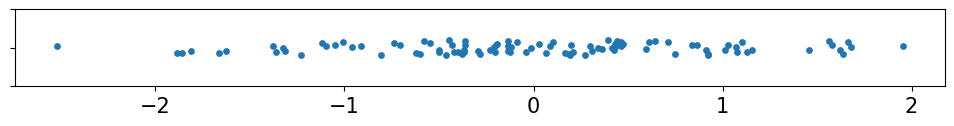

In [4]:
fig, ax = plt.subplots(1, figsize=(12, 1))
one_dim_scatterplot(data, ax, s=15, jitter = 0.2)

## Ejemplo

A continuación, presentamos un par de estadísticas sencillas y comunes. Para ilustrarlo, hemos extraído 20 muestras de una distribución normal.


La **media de una muestra** es una métrica calculada por medio de: $\displaystyle\frac{1}{n} \sum_i X_i$

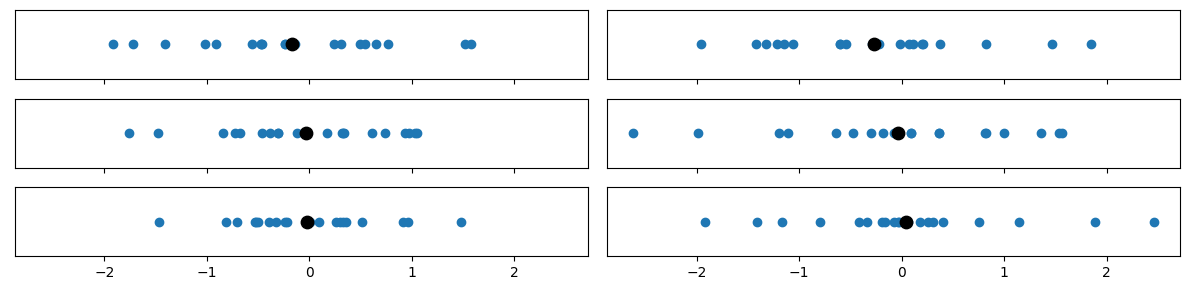

In [5]:
np.random.seed(42)
normal = stats.norm(0, 1)

fig, axs = plt.subplots(3, 2, figsize=(12, 3), sharex=True)

for ax in axs.flatten():
    samp = normal.rvs(20)
    ax.scatter(samp, np.repeat(0, 20))
    
    ## calcular la media y trazar en negro
    mean = np.mean(samp)
    ax.scatter([mean], 0, c="black", s=80)
    ax.tick_params(axis='both', which='major')
    ax.get_yaxis().set_ticks([])
plt.tight_layout()

El valor **máximo** se define por: $\max (X_1, X_2, \ldots, X_n)$

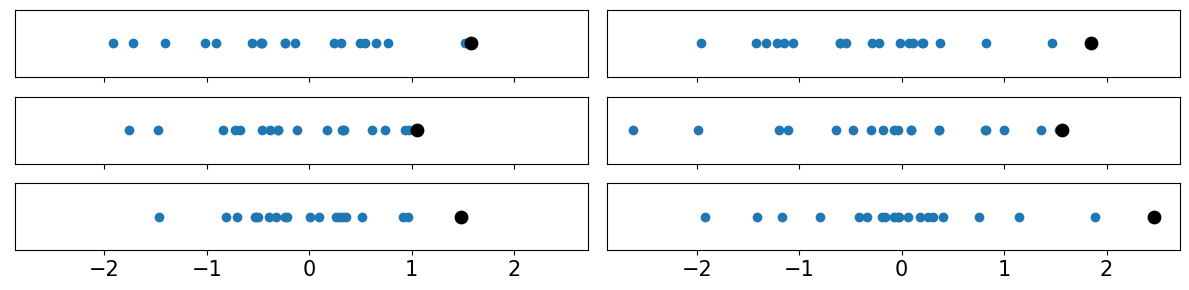

In [6]:
np.random.seed(42)
normal = stats.norm(0, 1)

fig, axs = plt.subplots(3, 2, figsize=(12, 3), sharex=True)

for ax in axs.flatten():
    samp = normal.rvs(20)
    ax.scatter(samp, np.repeat(0, 20))
    M = np.max(samp)
    ax.scatter([M], 0, c="black", s=80)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.get_yaxis().set_ticks([])
plt.tight_layout()

## Muestreo

### Cómo se **cuantifica** la **variación** de una muestra estadística?

Para cuantificar la variación de una muetsra estadística, en realidad nos gustaría un proceso como éste:

  - Extraer un cierto número de datos independientes e idénticamente distribuidos, $X$, es decir, una muestra, de la población.
  - Calcula el estadístico utilizando la muestra que has extraído.
  - Registra el valor de la estadística que acabas de calcular en una base de datos.
  - Hazlo de nuevo, y de nuevo, y de nuevo...
  
Una vez completado este proceso, tenemos muchos ejemplos de nuestra estadística, cada uno calculado a partir de una muestra aleatoria diferente de nuestra variable.

La distribución de *la estadística* que surge de este proceso se llama **distribución muestral de la estadística**.

### Ejemplo: Medias muestrales de una variable normal

Recordemos las medias muestrales del ejemplo anterior:

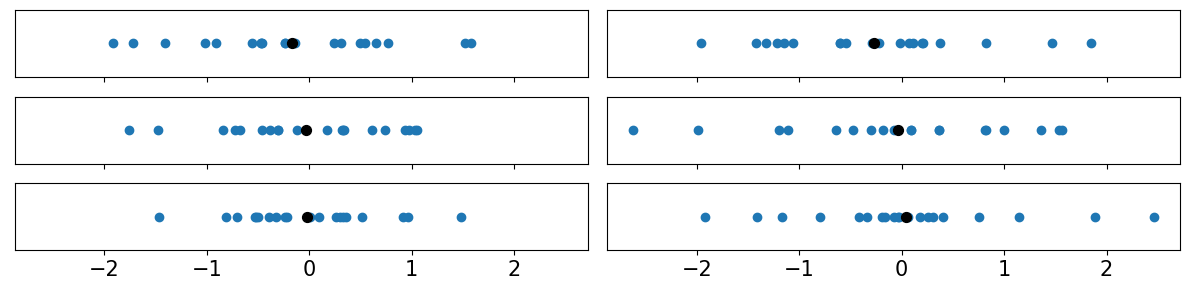

In [7]:
np.random.seed(42)
normal = stats.norm(0, 1)

fig, axs = plt.subplots(3, 2, figsize=(12, 3), sharex=True)

means = []
for ax in axs.flatten():
    samp = normal.rvs(20)
    ax.scatter(samp, np.repeat(0, 20))
    mean = np.mean(samp)
    means.append(mean)
    ax.scatter([mean], 0, c="black", s=50)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.get_yaxis().set_ticks([])
plt.tight_layout()

La distribución de los *puntos negros* es la **distribución mustral de la media**.

In [8]:
means = []
for i in range(10000):
    samp = normal.rvs(20)
    mean = np.mean(samp)
    means.append(mean)

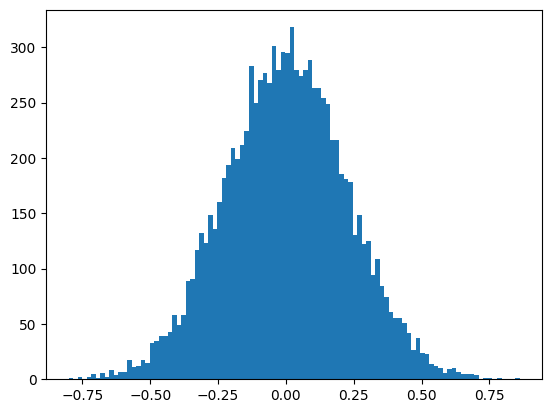

In [9]:
plt.hist(means, bins = 100);

  - ¿Cuál es el valor medio de la estadística?
  - ¿Cuánto varía la estadística en torno a su valor medio?

## Bootstrap

El teorema del límite central es un resultado central en la estadística matemática, y no hay ningún otro resultado en las materias con el carácter definitivo del CLT.

Por otro lado, tiene un gran inconveniente: sólo funciona para la media muestral

### Muestreo Bootstrap

Por lo general, tenemos un conjunto de datos fijo, que consideramos como una única muestra de la población.

La población es el objeto que nos interesa, y la muestra es la lente a través de la cual la vemos.

La idea detrás del bootstrap es que la distribución empírica de la muestra debe ser nuestra mejor aproximación a la distribución de la población de la que se extrae la muestra.

Esto significa que como no podemos tomar muestras repetidas de la población, nuestra siguiente opción es **tomar muestras de la propia muestra**.

### Bootstrap: The Big Idea

Queremos hacer esto:

> Estimar la varianza de un estadístico muestral tomando repetidamente muestras de la *población*, calculando las medias muestrales de estas muestras, y luego calculando la varianza de las múltiples medias muestrales.

Pero **no podemos**, porque **sólo podemos muestrear de la población una vez**.

En su lugar, tomamos muestras repetidamente de nuestra **mejor aproximación a la distribución de la población**, que viene dada por la **función de densidad empírica de la muestra**.

Es decir, en su lugar hacemos

> Estimar la varianza de las medias muestrales muestreando repetidamente de *una distribución que se aproxima a la distribución de la población*, calculando las medias muestrales de estas muestras, y luego calculando la varianza de las múltiples medias muestrales.

### Definición

Un **muestreo bootstrap** de un conjunto de datos es una muestra tomada con reemplazo de ese conjunto de datos cuyo tamaño es el del propio conjunto de datos.

In [10]:
def text_in_blank_plot(text, ax):
    '''make a text box'''
    _ = ax.text(0.5, 0.5, text, 
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=15)
    ax.axis('off')

C:\Users\JJIMENEZG\AppData\Local\Temp\ipykernel_15520\205980590.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot2grid((6, 3), (0, 0), colspan=2) # Número de columnas para que el eje se extienda hacia abajo.


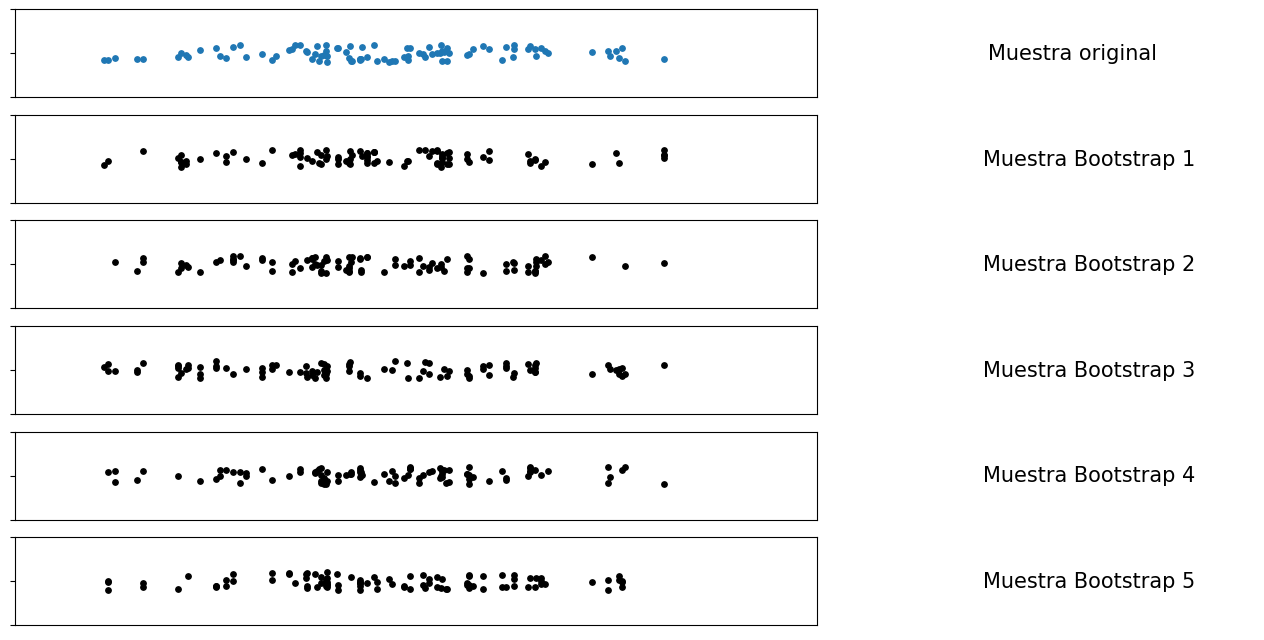

In [11]:
np.random.seed(42)
fig = plt.subplots(1, 1, figsize=(16, 8))

ax = plt.subplot2grid((6, 3), (0, 0), colspan=2) # Número de columnas para que el eje se extienda hacia abajo.
ax.get_xaxis().set_ticks([])
ax.set_xlim(-2.5, 3)
one_dim_scatterplot(data, ax, s=15)

ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("Muestra original", ax)

## boostrapping 5 times
for i in range(0, 5):
    bootstrap = np.random.choice(data, size=len(data), replace=True)
    # key line for bootstrapping
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.get_xaxis().set_ticks([])
    ax.set_xlim(-2.5, 3)
    one_dim_scatterplot(bootstrap, ax, s=15, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1, sharex = ax)
    text_in_blank_plot("Muestra Bootstrap {}".format(i+1), ax)
# plt.tight_layout()

Cada muestra bootstrap tiene su propia mediana muestral

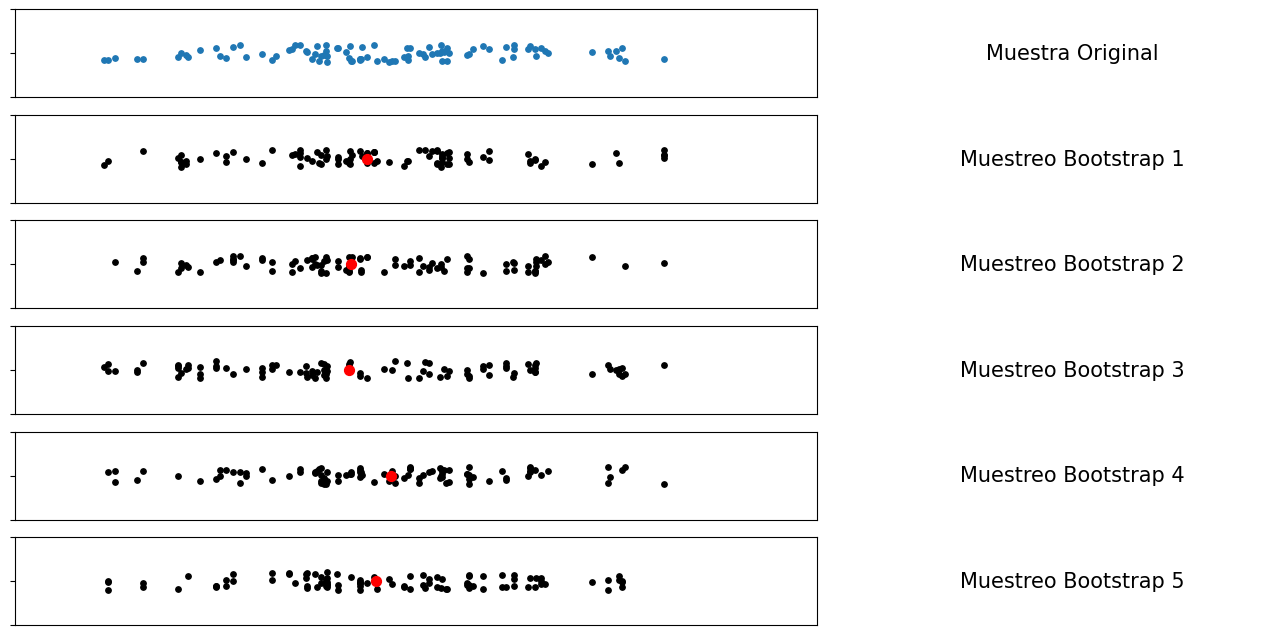

In [12]:
np.random.seed(42)
fig = plt.figure(figsize=(16, 8))
# colspan: Number of columns for the axis to span downwards.
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2) 
ax.get_xaxis().set_ticks([])
ax.set_xlim(-2.5, 3)
one_dim_scatterplot(data, ax, s=15)

ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("Muestra Original", ax)

## boostrapping 5 times
for i in range(0, 5):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.get_xaxis().set_ticks([])
    ax.set_xlim(-2.5, 3)
    one_dim_scatterplot(bootstrap_sample, ax, c="black", s=15)
    sample_median = np.median(bootstrap_sample)
    ax.scatter([sample_median], 0, c="red", s=50)
    # median
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Muestreo Bootstrap {}".format(i+1), ax)


Las medianas muestrales tomadas a partir de muestras bootstrap repetidas son entonces una aproximación a la **distribución de las medianas muestrales**

In [13]:
def bootstrap_sample_medians(data, n_bootstrap_samples=10**4):
    bootstrap_sample_medians = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_medians.append(np.median(bootstrap_sample))
    return bootstrap_sample_medians

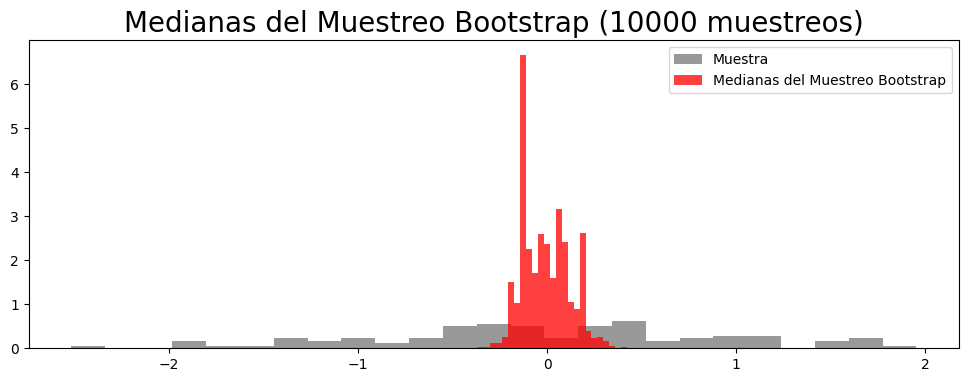

In [14]:
np.random.seed(321)
bootstrap_medians = bootstrap_sample_medians(data)

fig, ax = plt.subplots(1, figsize=(12, 4))
ax.hist(data, bins=25, density=True, color="black", alpha=0.4,
        label="Muestra")
ax.hist(bootstrap_medians, bins=25, density=True, color="red", alpha=0.75,
        label="Medianas del Muestreo Bootstrap")
ax.legend()
# ax.tick_params(axis='both', which='major', labelsize=15)
_ = ax.set_title("Medianas del Muestreo Bootstrap (10000 muestreos)", fontsize = 20)

Ahora podemos utilizar la distribución bootstrap de la meadiana de la muestra para estimar estadísticas que, de otro modo, serían inalcanzables

In [15]:
variance_of_sample = np.var(data)
varaince_of_bootstrap_medians = np.var(bootstrap_medians)

print("Varianza de la muestra: {:2.2f}".format(variance_of_sample))
print("Varianza de las medianas: {:2.2f}".format(varaince_of_bootstrap_medians))

Varianza de la muestra: 0.82
Varianza de las medianas: 0.02


## Intervalos de confianza

Recordemos nuestra afirmación anterior

> Nuestro interés general es la **población**, la **muestra** es sólo la lente a través de la cual la vemos.

Hemos demostrado que **los estadísticos muestrales son generalmente buenas aproximaciones de las propiedades de la población**, y también hemos descubierto **métodos para aproximar la distribución de los estadísticos muestrales**, como el bootstrapping y el teorema del límite central.

Todo ello nos permite abordar una última cuestión

> ¿Qué tan buena es la aproximación de un parámetro de la población en un estadístico muestral?

### Ejemplo: Muestreo Bootstrap para el Intervalo de Confianza del Percentil 75

Los intervalos basados en percentiles se basan en:
La distribución simulada se asemeja a la distribución muestral del estadístico, y su desviación estándar se aproxima al error estándar de dicha distribución.

Consideremos la estimación de un intervalo de confianza del percentil 75 de una población.  En este caso, el teorema del límite central no nos permite derivar una forma matemática de la distribución muestral, sino que podemos proceder utilizando el muestreo bootstrap.

Este es el procedimiento bootstrap para calcular un intervalo de confianza para un percentil 75

  - Extraiga muchas muestras bootstrap de su muestra principal, y para cada una de ellas
    - Calcule la estadística de la muestra (utilizando la muestra bootstrap)
  - Reúna todos los estadísticos muestrales de las distintas muestras bootstrap en una lista.
  
La lista resultante puede considerarse como una muestra de la distribución muestral de la estadística.

  - Calcule el intervalo de confianza del 95% encontrando los percentiles 0,025 y 0,975 de la lista resultante de estadísticas muestrales.

In [16]:
np.random.seed(42)
bootstrap_sample_75_percentiles = []
for i in range(10000):
    bootstrap = np.random.choice(data, size=len(data), replace=True)
    bootstrap_75_percentile = np.percentile(bootstrap, 75)
    bootstrap_sample_75_percentiles.append(bootstrap_75_percentile)

Este código crea una aproximación a la distribución muestral de la estadística.

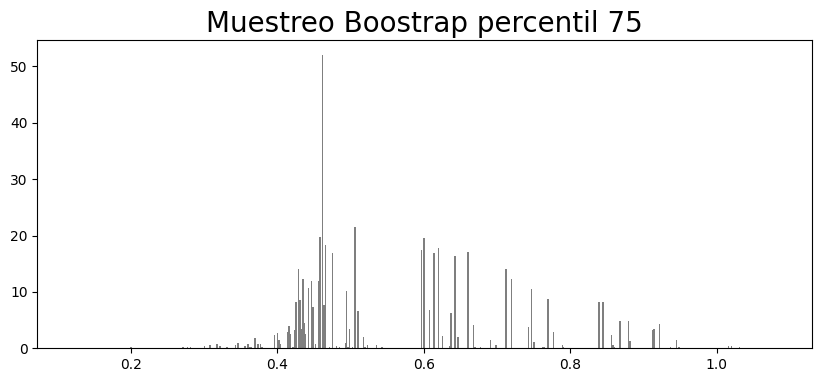

In [17]:
fig, ax = plt.subplots(1, figsize=(10, 4))
ax.hist(bootstrap_sample_75_percentiles, bins=500, density=True, color="black", alpha=0.5)
ax.set_title("Muestreo Boostrap percentil 75", fontsize=20);

Obtenemos un intervalo de confianza calculando los percentiles 0,025 y 0,975 de la aproximación de la distribución muestral resultante

In [18]:
left_endpoint = np.percentile(bootstrap_sample_75_percentiles, 2.5)
right_endpoint = np.percentile(bootstrap_sample_75_percentiles, 97.5)

print("Muestra Percentil 75: {:2.2f}".format(np.percentile(data, 75)))
print("Muestreo Bootstrap para Intervalo de Confianza del percentil 75: [{:2.2f}, {:2.2f}]".format(
    left_endpoint, right_endpoint))

Muestra Percentil 75: 0.51
Muestreo Bootstrap para Intervalo de Confianza del percentil 75: [0.40, 0.91]


### Bootstrap: Resumen

El Bootstrap es una herramienta para **cuantificar la variación de una estimación estadística**.  Puede utilizarse en casi **cualquier** situación.

El bootstrap es un punto gigantesco a favor de la cantidad masiva de computación que todos tenemos a nuestra disposición en la actualidad.  Antes de la era informática, la práctica de la estadística era tediosa y matemática.  Ahora podemos estimar cosas que las generaciones anteriores **nunca habrían soñado** con sólo poner a trabajar algunos MB de memoria.